https://www.youtube.com/watch?v=-SSX3uoMc34&list=PLwDQt7s1o9J65aQ6HYN4LaqRkX8ncKG1D&index=77ㄩ

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.neighbors import KNeighborsRegressor

import sklearn.datasets as datasets

In [2]:
faces = datasets.fetch_olivetti_faces()  #臉部數據 data'data is the same with image'data 

#image is Three-dimensional.data is  Two-dimensional.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\box62\scikit_learn_data


In [3]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
data = faces['images']
data.shape

(400, 64, 64)

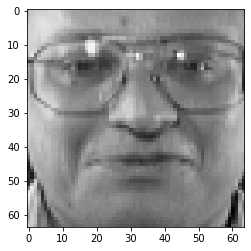

In [7]:
index = np.random.randint(400,size = 1)[0]

plt.imshow(data[index],cmap = plt.cm.gray)

In [13]:
# 上半张人脸
X = data[:,:32].reshape(400,-1)

# 下半张人脸
y = data[:,32:].reshape(400,-1)

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 10)

X_train.shape

(390, 2048)

In [17]:
y_train.shape

(390, 2048)

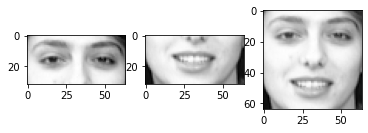

In [24]:

#random one face
index = np.random.randint(390,size = 1)[0]


face_up = X_train[index].reshape(32,64)
face_down = y_train[index].reshape(32,64)
ax = plt.subplot(1,3,1)
ax.imshow(face_up,cmap = plt.cm.gray)

ax = plt.subplot(1,3,2)
ax.imshow(face_down,cmap = plt.cm.gray)

ax = plt.subplot(1,3,3)
ax.imshow(np.concatenate([face_up,face_down],axis = 0),cmap = 'gray')

In [25]:
#四個算法

estimators = {}


estimators['KNN'] = KNeighborsRegressor(n_neighbors=5)


estimators['Lr'] = LinearRegression()

estimators['Ridge'] = Ridge(alpha=1)

estimators['Lasso'] = Lasso(alpha=1)

In [26]:
predict_ = {}
for key,model in estimators.items():
    model.fit(X_train,y_train)
    
#     预测：根据上半张量，预测下半张脸
    y_ = model.predict(X_test)
    # 預測結果放到字典當中
    predict_[key] = y_

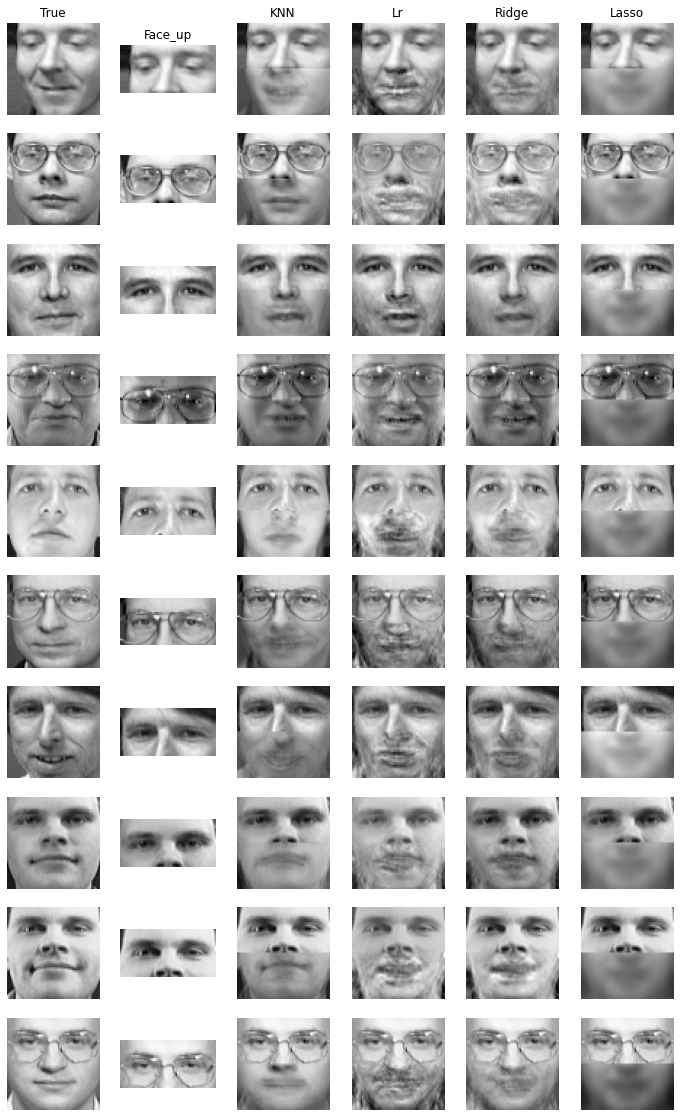

In [29]:
# 可视化

# 10行，6列
plt.figure(figsize=(6*2,10*2))


#     第一列    #     第二列 原始與上半張     #     第三四五六列 算出來

for i in range(10):
#     第一列
    ax = plt.subplot(10,6,1 + i * 6)
    face_up = X_test[i].reshape(32,64)
    face_down = y_test[i].reshape(32,64)
    ax.imshow(np.concatenate([face_up,face_down],axis = 0),cmap = 'gray')  # 合併
    ax.axis('off')
    if i == 0:
        ax.set_title('True')
    
    #     第二列
    ax = plt.subplot(10,6,2 + i * 6)
    ax.imshow(face_up,cmap = 'gray')
    ax.axis('off')
    if i == 0:
        ax.set_title('Face_up')
        

#     第三列：3 + i*6 第四列4 + i*6 
#     预测人脸 predict_ 字典
    for j ,key in enumerate(predict_):
        ax = plt.subplot(10,6,3 + j + i * 6)
        
        y_ = predict_[key]
        
        face_down_ = y_[i].reshape(32,64)
        
        ax.imshow(np.concatenate([face_up,face_down_],axis = 0),cmap = plt.cm.gray)
        
        ax.axis('off')
        
        if i ==0:
            ax.set_title(key)